Sveučilište u Zagrebu

Fakultet elektrotehnike i računarstva

## Neizrazito, evolucijsko i neuroračunarstvo

### 6. zadatak - Neuro-fuzzy

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### 1. funkcije pripadnosti

In [4]:
f = open("rules.txt", "r")
rules = [[float(x) for x in line.strip().split(" ")] for line in f.readlines()]
f.close()

In [5]:
def sigm(a, b, x):
    return 1 / (1 + exp(b*(x - a)))

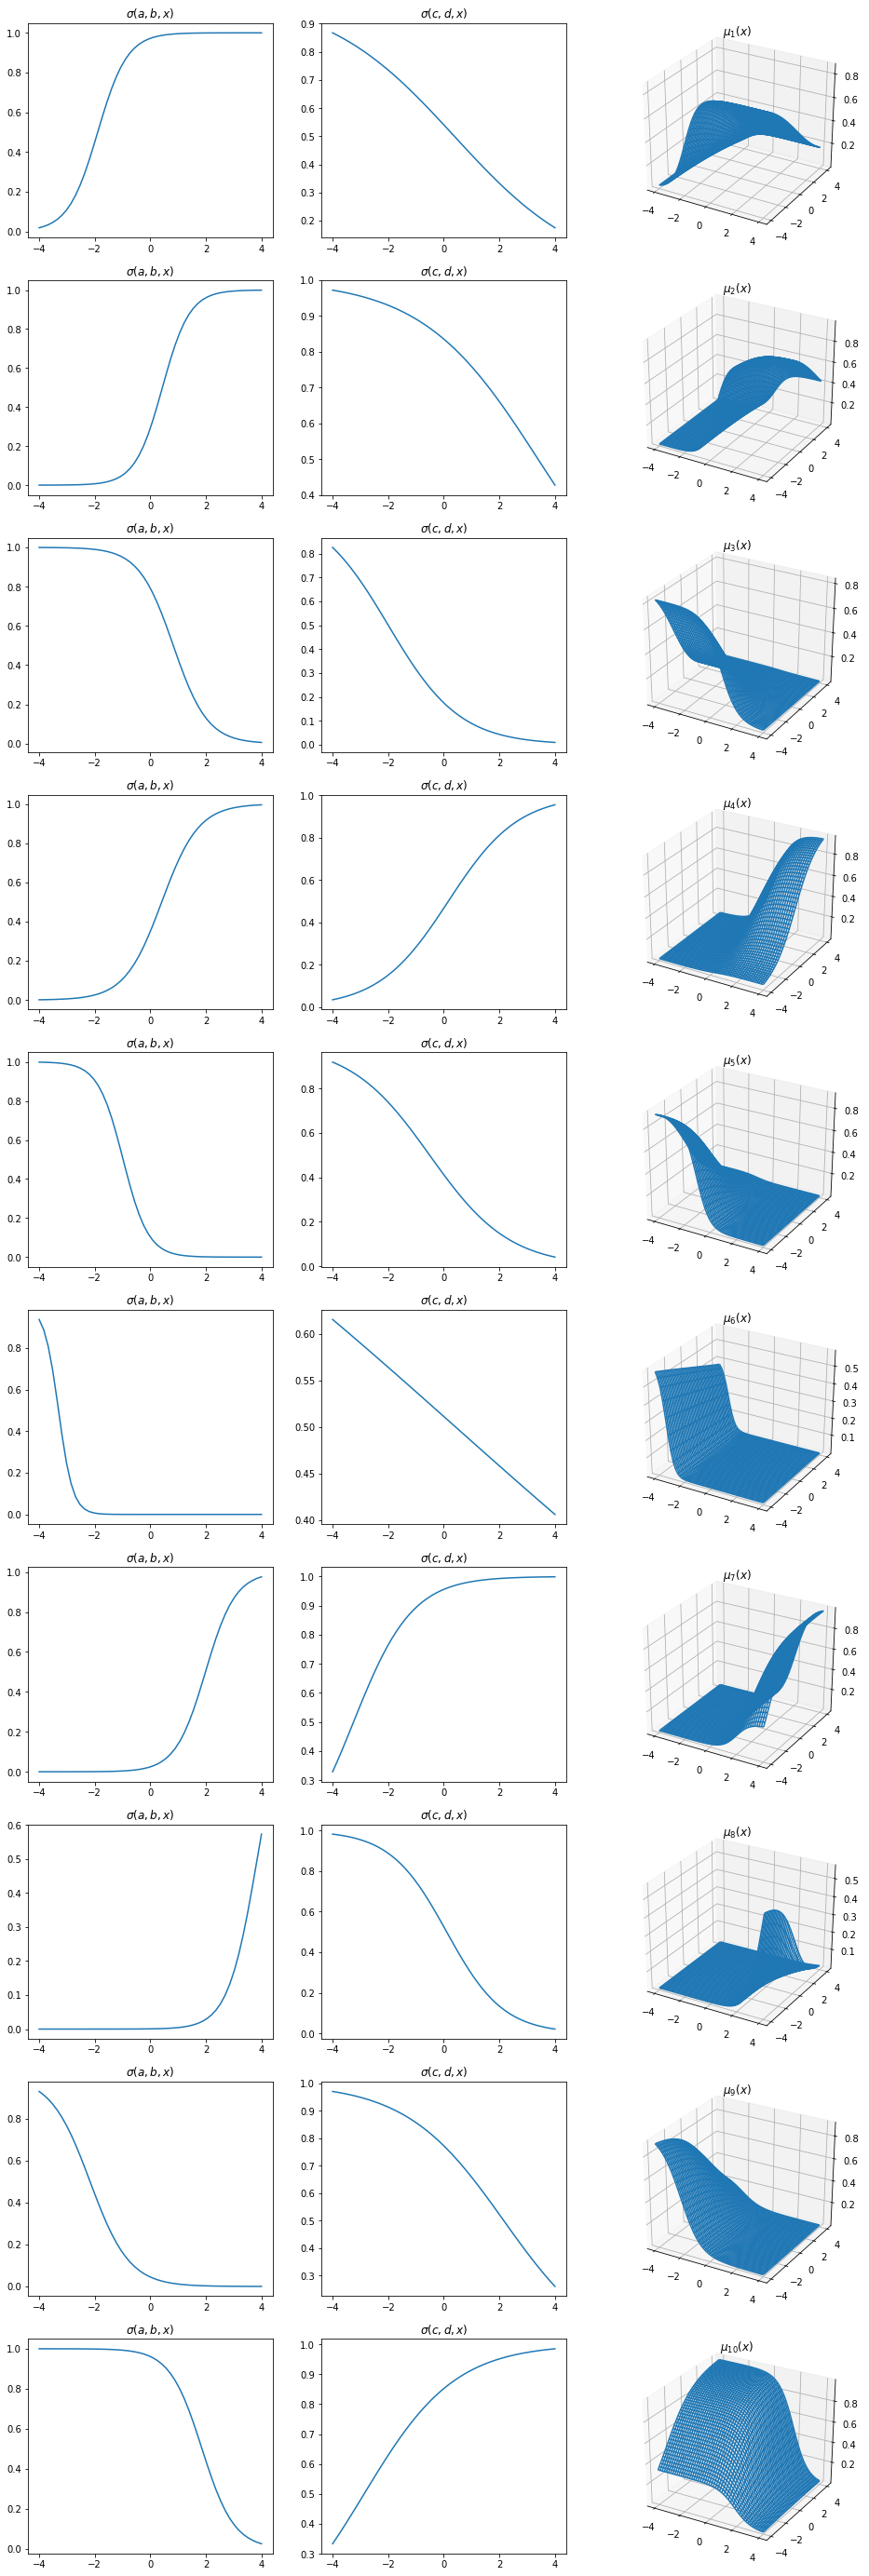

In [22]:
fig = plt.figure(figsize=(16, 5*len(rules)))
X = linspace(-4, 4)
x, y = np.meshgrid(linspace(-4, 4), linspace(-4, 4))
i = 1
k = 1
for idx, rule in enumerate(rules):
    a, b, c, d = rule
    y1 = sigm(a, b, X)
    plt.subplot(len(rules), 3, i)
    plt.title(r'$\sigma(a,b,x)$')
    plt.plot(X, y1)
    i = i + 1
    y2 = sigm(c, d, X)
    plt.subplot(len(rules), 3, i)
    plt.title(r'$\sigma(c,d,y)$')
    plt.plot(X, y2)
    i = i + 1
    ax = fig.add_subplot(len(rules), 3, i, projection='3d', title=r'$\mu_{%d}(x)$' % k)
    k = k + 1
    Z = sigm(a, b, x) * sigm(c, d, y)
    ax.plot_wireframe(x, y, Z)
    i = i + 1
plt.show()

#### 2. ovisnost o stopi učenja

In [58]:
f = open("errors-eta-sgd.txt", "r")
errors_eta_sgd = [[float(x) for x in line.strip().split(" ")] for line in f.readlines()]
f.close()
f = open("errors-eta-grad.txt", "r")
errors_eta_grad = [[float(x) for x in line.strip().split(" ")] for line in f.readlines()]
f.close()

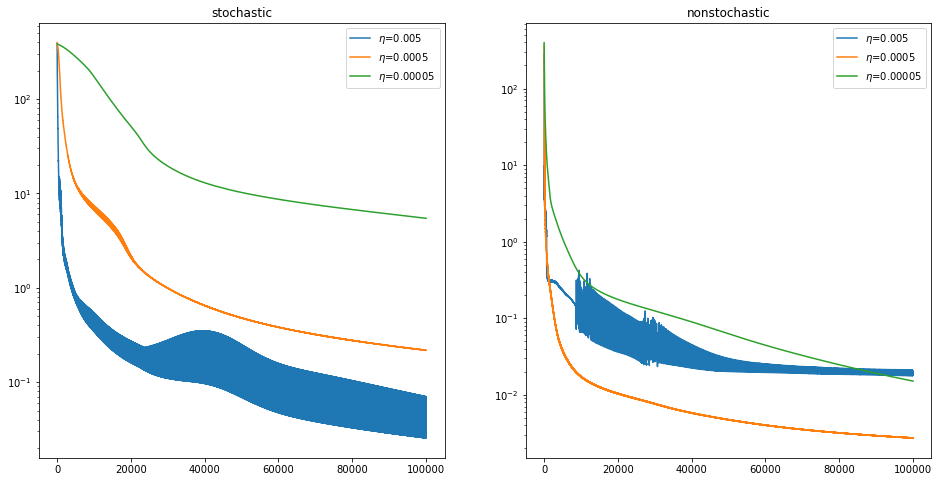

In [59]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(errors_eta_sgd)
plt.title('stochastic')
plt.yscale('log')
plt.legend([r'$\eta$=0.005', r'$\eta$=0.0005', r'$\eta$=0.00005'])
plt.subplot(1,2,2)
plt.title('nonstochastic')
plt.plot(errors_eta_grad)
plt.yscale('log')
plt.legend([r'$\eta$=0.005', r'$\eta$=0.0005', r'$\eta$=0.00005'])
plt.show()

#### 3. stohastički v. pravi gradijentni spust

In [32]:
f = open("errors-gradient.txt", "r")
errors_gradient = [[float(x) for x in line.strip().split(" ")] for line in f.readlines()]
f.close()

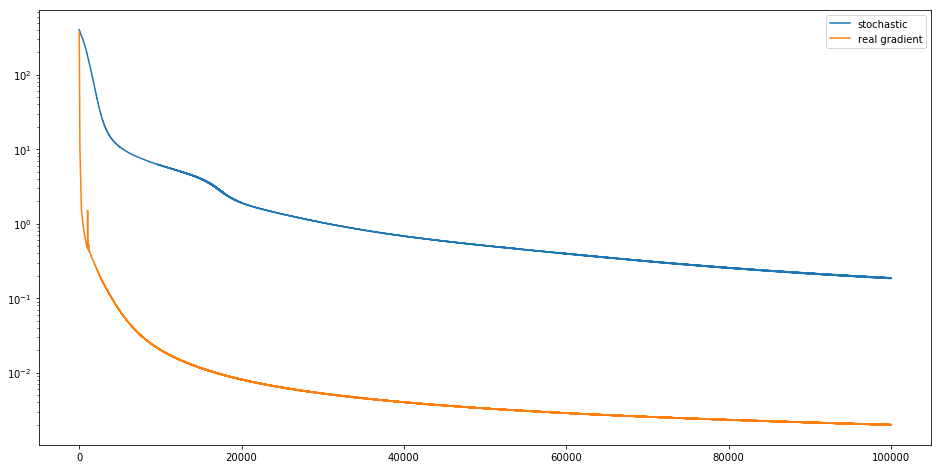

In [33]:
plt.figure(figsize=(16,8))
plt.plot(errors_gradient)
plt.yscale('log')
plt.legend(['stochastic', 'real gradient'])
plt.show()

#### 4. greška primjera

In [76]:
f = open("error.txt", "r")
errors = [[float(x) for x in line.strip().split(" ")] for line in f.readlines()]
f.close()
f = open("sample.txt", "r")
sample = [[float(x) for x in line.strip().split(" ")] for line in f.readlines()]
f.close()
f = open("predict.txt", "r")
predict = [[float(x) for x in line.strip().split(" ")] for line in f.readlines()]
f.close()

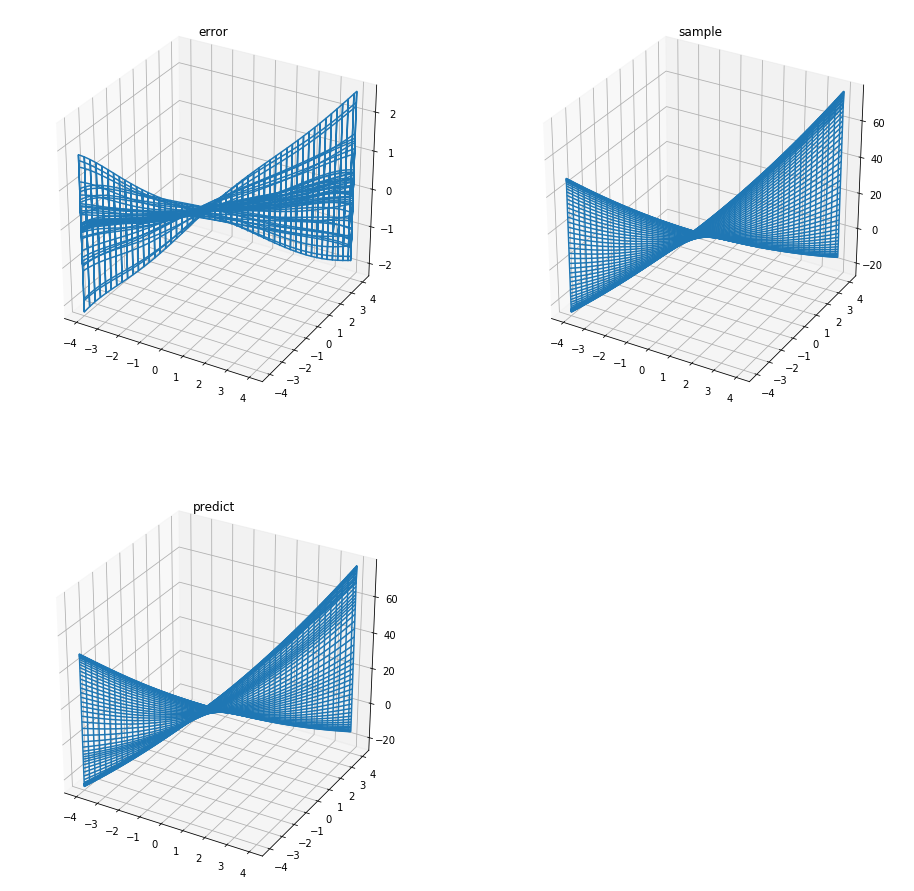

In [77]:
X = linspace(-4,4, 100)
Y = linspace(-4,4, 100)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(221, projection='3d', title='error')
ax.plot_wireframe(X, Y, errors)
ax = fig.add_subplot(222, projection='3d', title='sample')
ax.plot_wireframe(X, Y, sample)
ax = fig.add_subplot(223, projection='3d', title='predict')
ax.plot_wireframe(X, Y, predict)

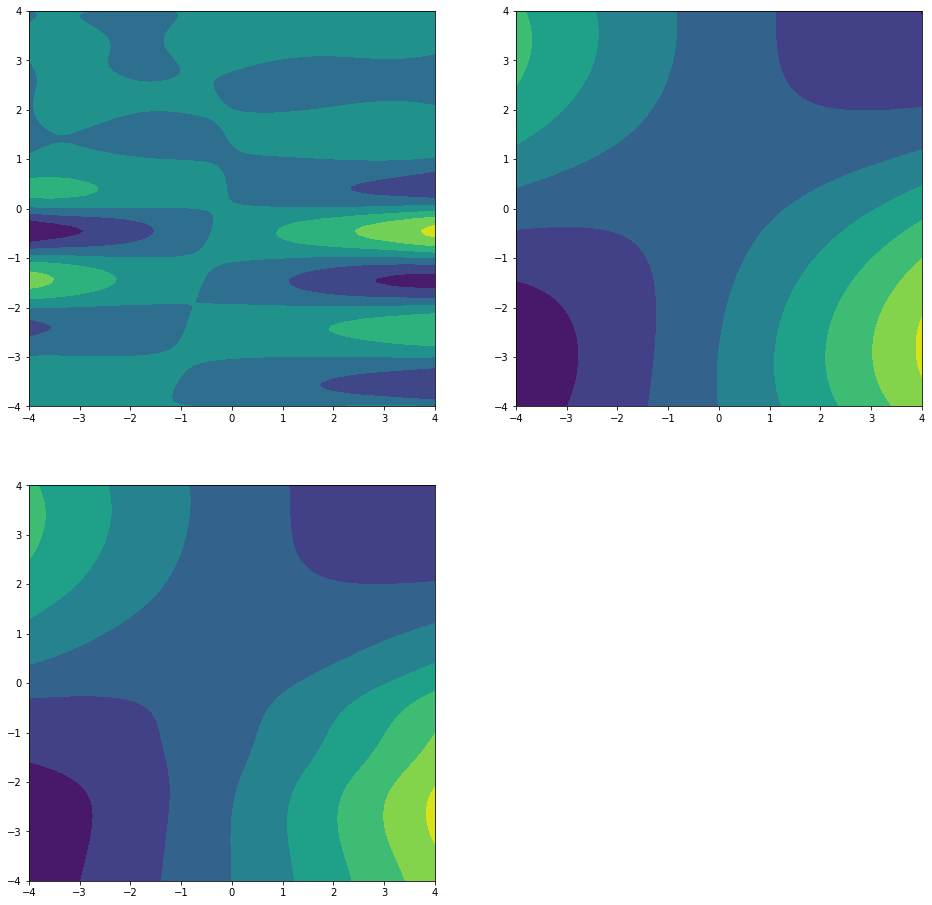

In [78]:
X = linspace(-4,4, 100)
Y = linspace(-4,4, 100)
plt.figure(figsize=(16,16))
subplot(2,2,1)
plt.contourf(X, Y, errors)
subplot(2,2,2)
plt.contourf(X, Y, sample)
subplot(2,2,3)
plt.contourf(X, Y, predict)